## **Environment Preparation**

**Install Java 8**

Run the cell on the **Google Colab** to install jdk 1.8.

**Note:** if you run this notebook on your computer, root permission is required when running the cell to install Java 8. (You may ignore this cell if Java 8 has already been set up in your computer).


In [ ]:
# Install jdk8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
import os
# Set environment variable JAVA_HOME.
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
!java -version

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode
openjdk version "1.8.0_342"
OpenJDK Runtime Environment (build 1.8.0_342-8u342-b07-0ubuntu1~18.04-b07)
OpenJDK 64-Bit Server VM (build 25.342-b07, mixed mode)


**Install BigDL Orca**

You can install the latest pre-release version using `pip install --pre --upgrade bigdl-orca`. 

In [ ]:
# Install latest pre-release version of BigDL Orca 
# Installing BigDL Orca from pip will automatically install pyspark, bigdl, and their dependencies.
!pip install --pre --upgrade bigdl-orca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.9 MB 1.3 MB/s 
     |████████████████████████████████| 35.4 MB 125 kB/s 
     |████████████████████████████████| 53.5 MB 191 kB/s 
     |████████████████████████████████| 71.0 MB 601 bytes/s 
     |████████████████████████████████| 48.2 MB 1.5 MB/s 
     |████████████████████████████████| 218.4 MB 56 kB/s 
     |████████████████████████████████| 197 kB 53.5 MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.6-py2.py3-none-any.whl size=218814407 sha256=5bc78721e4f19a1086e8239c0e290b03b754db996838f2ecbce81baa5e48332c
  Stored in directory: /root/.cache/pip/wheels/f1/42/b0/ba397759613f4feb1611021a2503e60e344e546671b2ae04f8
Successfully built pyspark


In [ ]:
# Install required dependencies
!pip install tensorflow==1.15.0 tensorflow-datasets==2.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 412.3 MB 25 kB/s 
     |████████████████████████████████| 3.1 MB 40.9 MB/s 
     |████████████████████████████████| 503 kB 37.8 MB/s 
     |████████████████████████████████| 50 kB 6.9 MB/s 
     |████████████████████████████████| 3.8 MB 48.4 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=8568b8cececc83ac9e563707ad07b13f3f222b20d9d4d9827b562085b6da0baa
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      

In [ ]:
pip install 'h5py==2.10.0'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 4.1 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [ ]:
pip install keras-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 3.9 MB/s 


In [ ]:
!pip uninstall keras-nightly
!pip uninstall -y tensorflow
!pip install keras==2.1.6
!pip install tensorflow==1.15.0
!pip install tensorflow-datasets==3.2.1
!pip install h5py==2.10.0

Found existing installation: keras-nightly 2.11.0.dev2022091907
Uninstalling keras-nightly-2.11.0.dev2022091907:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/keras/*
    /usr/local/lib/python3.7/dist-packages/keras_nightly-2.11.0.dev2022091907.dist-info/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/keras/api/_v1/keras/mixed_precision/experimental/__init__.py
    /usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/mixed_precision/experimental/__init__.py
    /usr/local/lib/python3.7/dist-packages/keras/api/keras/mixed_precision/experimental/__init__.py
    /usr/local/lib/python3.7/dist-packages/keras/combinations.py
    /usr/local/lib/python3.7/dist-packages/keras/keras_parameterized.py
    /usr/local/lib/python3.7/dist-packages/keras/layers/advanced_activations.py
    /usr/local/lib/python3.7/dist-packages/keras/layers/convolutional.py
    /usr/local/lib/python3.7/dist-packages/keras/layers/convolutional_recurrent.py
   

### Imports

In [ ]:
import argparse
import matplotlib.pyplot as plt
from tensorflow import keras
from bigdl.orca import init_orca_context, stop_orca_context
from bigdl.orca.learn.tf.estimator import Estimator
from bigdl.orca import OrcaContext
import tensorflow as tf
import tensorflow_datasets as tfds
import datetime
import time
from bigdl.orca.learn.tf.estimator import Estimator
from tabulate import tabulate
OrcaContext.log_output = False
# OrcaContext.log_output = True # recommended to set it to True when running BigDL in Jupyter notebook (this will display terminal's  stdout and stderr in the Jupyter notebook).

## Utils

In [ ]:
def train_test(model=None, train_data=None, test_data=None, preprocess=None, output_model_name=None, save_model=False, epochs=1, cluster_mode="spark-submit", num_nodes=2, cores=2):
    init_orca_context(cluster_mode=cluster_mode, num_modes=min(3, num_nodes), cores=min(4, cores))
    if not model:
        model = keras.Sequential(
        [keras.layers.Conv2D(20, kernel_size=(5, 5), strides=(1, 1), activation='tanh',
                             input_shape=(28, 28, 1), padding='valid'),
         keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
         keras.layers.Conv2D(50, kernel_size=(5, 5), strides=(1, 1), activation='tanh',
                             padding='valid'),
         keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
         keras.layers.Flatten(),
         keras.layers.Dense(500, activation='tanh'),
         keras.layers.Dense(10, activation='softmax'),
         ]
        )

        model.compile(optimizer=keras.optimizers.RMSprop(),
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])
    if not (train_data or test_data):
        if not preprocess:
            def preprocess(data):
              data['image'] = tf.cast(data["image"], tf.float32) / 255.
              return data['image'], data['label']

        # get DataSet
        train_data = tfds.load(name="mnist", split="train", data_dir="gs://tfds-data/datasets")
        test_data = tfds.load(name="mnist", split="test", data_dir="gs://tfds-data/datasets")

        train_data = train_data.map(preprocess)
        test_data = test_data.map(preprocess)
    
    # Disable AutoShard.
    options = tf.data.Options()
    options.experimental_distribute.auto_shard = False
    train_data = train_data.with_options(options)
    test_data = test_data.with_options(options)
    
    est = Estimator.from_keras(keras_model=model)
    #This will come as an argument for the Function
    #validation_data will be given as an argument in the Function
    tic = time.time()
    est.fit(
        data=train_data,
        batch_size=320,
        epochs=epochs,
        validation_data=test_data
    )
    tac = time.time()
    fit_time = tac-tic
    # evaluate and print result
    # result = est.evaluate(test_data)
    # print(result)
    output_name = "/tmp/" + (f"{output_model_name+str(datetime.datetime.now()) if output_model_name else str(datetime.datetime.now())}.h5")
    output_name = output_name.replace(" ", "_")
    if save_model:
        est.save_keras_model(output_name)
    # return output_name, fit_time, est
    return output_name, fit_time

def save_output(output_model_name, time, result_estimator):
    print(f"Saving output to: {output_model_name}")
    
def visualize_output(output_model_name):
    print(f"Visualizing from: {output_model_name}")

def train_test_save(model=None, train_data=None, test_data=None, preprocess=None, output_model_name=None, save_model=False, epochs=10, cluster_mode="spark-submit", num_nodes=2, cores=2):
    output_model_name, fit_time = train_test(
        model=model,
        train_data=train_data,
        test_data=test_data,
        preprocess=preprocess,
        output_model_name=output_model_name,
        epochs=epochs,
        cluster_mode=cluster_mode,
        num_nodes=num_nodes,
        cores=cores,
        save_model=save_model
    )
    print(f"---->>> {output_model_name}, {num_nodes} nodes, {cores} cores, fitted after {fit_time}sec")
    save_output(output_model_name, time, None)
    visualize_output(output_model_name)
    return output_model_name, fit_time

def grid_search(model=None, train_data=None, test_data=None, preprocess=None, output_model_name=None, save_model=False, epochs=10, cluster_mode="spark-submit", min_num_nodes=2, max_num_nodes=3, min_cores=1, max_cores=4):
    results = []
    assert min_num_nodes<=max_num_nodes
    assert min_cores<=max_cores
    for num_nodes in range(min_num_nodes, max_num_nodes):
        for cores in range(min_cores, max_cores):
            model_name, fit_time = train_test_save(
                model=model,
                train_data=train_data,
                test_data=test_data,
                preprocess=preprocess,
                output_model_name=output_model_name,
                epochs=epochs,
                cluster_mode=cluster_mode,
                num_nodes=num_nodes,
                cores=cores,
                save_model=save_model
            )
            results.append((model_name, num_nodes, cores, fit_time))
    return results

def visualize_grid_search(model_name, epochs, results):
    xs, ys = [], []
    for datum in results:
        name, nodes, cores, fit_time = datum
        xs.append(f"{nodes}, {cores}")
        ys.append(fit_time/1000)
        plt.bar(xs, ys)
    items = zip(xs, ys)
    print(items)
    print(xs, ys)
    print(tabulate(items, tablefmt="github"))
    plt.title(f"{model_name}: {epochs} epochs")
    plt.xlabel("Nodes, Cores")
    plt.ylabel("Train time (*10^3 sec)")
    plt.plot()

def tabulate_grid_search(model_name, epochs, results):
    xs, ys = [], []
    for datum in results:
        name, nodes, cores, fit_time = datum
        xs.append(f"{nodes}, {cores}")
        ys.append(fit_time)
    items = zip(xs, ys)
    print(model_name)
    print(tabulate(items, tablefmt="github", headers=["Nodes, Cores", "fit_time (sec)"]))

### Datasets

In [ ]:
## MNIST
def preprocess(data):
    data['image'] = tf.cast(data["image"], tf.float32) / 255.
#     data['image'] = tf.image.resize(data["image"], (72, 72))
#     data['image'] = tf.image.grayscale_to_rgb(data["image"])
    return data['image'], data['label']

# get DataSet
train_data_mnist = tfds.load(name="mnist", split="train", data_dir="gs://tfds-data/datasets")
test_data_mnist = tfds.load(name="mnist", split="test",  data_dir="gs://tfds-data/datasets")

train_data_mnist = train_data_mnist.map(preprocess)
test_data_mnist = test_data_mnist.map(preprocess)

In [ ]:
## Camelyon
def preprocess_camelyon(data):
    data['image'] = tf.cast(data["image"], tf.float32) / 255.
    """data['image'] = tf.image.resize(data["image"], (72, 72))
    data['image'] = tf.image.grayscale_to_rgb(data["image"])"""
    return data['image'], data['label']

train_data_chamelyon = tfds.load(name="patch_camelyon", split="train",  data_dir="gs://mybucket-bigdl-ece-ntua")
test_data_chamelyon = tfds.load(name="patch_camelyon", split="test",  data_dir="gs://mybucket-bigdl-ece-ntua")

train_data_chamelyon = train_data_chamelyon.map(preprocess_camelyon)
test_data_chamelyon = test_data_chamelyon.map(preprocess_camelyon)


## Training for 1 epoch

In [ ]:
name = "SimpleCNN"

epochs = 1
min_num_nodes = 1
max_num_nodes = 2
min_cores = 1
max_cores = 5

current_training_data = train_data_mnist
current_test_data = test_data_mnist

results = grid_search(
    cluster_mode="local",
    min_num_nodes=min_num_nodes,
    max_num_nodes=max_num_nodes,
    min_cores=min_cores,
    max_cores=max_cores,
    epochs=epochs,
    train_data=current_training_data,
    test_data=current_test_data,
    output_model_name="simple"
)


Initializing orca context
Current pyspark location is : /usr/local/lib/python3.7/dist-packages/pyspark/__init__.py
Start to getOrCreate SparkContext
pyspark_submit_args is:  --driver-class-path /usr/local/lib/python3.7/dist-packages/bigdl/share/orca/lib/bigdl-orca-spark_2.4.6-2.1.0-SNAPSHOT-jar-with-dependencies.jar:/usr/local/lib/python3.7/dist-packages/bigdl/share/dllib/lib/bigdl-dllib-spark_2.4.6-2.1.0-SNAPSHOT-jar-with-dependencies.jar:/usr/local/lib/python3.7/dist-packages/bigdl/share/core/lib/all-2.1.0-20220830.075029-19.jar pyspark-shell 


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Successfully got a SparkContext







Instructions for updating:
Use `tf.cast` instead.






creating: createZooKerasSparseCategoricalCrossEntropy
creating: createLoss
creating: createZooKerasSparseCategoricalAccuracy
creating: createFakeOptimMethod
creating: createTFValidationMethod
creating: createTFValidationMethod


creating: createTFTrainingHelper
creating: createIdentityCriterion
creating: createEstimator
creating: createMaxEpoch
creating: createEveryEpoch
---->>> /tmp/simple2022-09-20_06:54:40.275934.h5, 1 nodes, 1 cores, fitted after 93.10098314285278sec
Saving output to: /tmp/simple2022-09-20_06:54:40.275934.h5
Visualizing from: /tmp/simple2022-09-20_06:54:40.275934.h5
Initializing orca context


/usr/local/lib/python3.7/dist-packages/bigdl/orca/common.py:251: Warning: Use an existing SparkContext, cluster_mode is determined by the existing SparkContext
  "cluster_mode is determined by the existing SparkContext", Warning)


creating: createZooKerasSparseCategoricalCrossEntropy
creating: createLoss
creating: createZooKerasSparseCategoricalAccuracy
creating: createFakeOptimMethod
creating: createTFValidationMethod
creating: createTFValidationMethod
creating: createTFTrainingHelper
creating: createIdentityCriterion
creating: createEstimator
creating: createMaxEpoch
creating: createEveryEpoch
---->>> /tmp/simple2022-09-20_06:56:08.024091.h5, 1 nodes, 2 cores, fitted after 87.336998462677sec
Saving output to: /tmp/simple2022-09-20_06:56:08.024091.h5
Visualizing from: /tmp/simple2022-09-20_06:56:08.024091.h5
Initializing orca context


/usr/local/lib/python3.7/dist-packages/bigdl/orca/common.py:251: Warning: Use an existing SparkContext, cluster_mode is determined by the existing SparkContext
  "cluster_mode is determined by the existing SparkContext", Warning)


creating: createZooKerasSparseCategoricalCrossEntropy
creating: createLoss
creating: createZooKerasSparseCategoricalAccuracy
creating: createFakeOptimMethod
creating: createTFValidationMethod
creating: createTFValidationMethod
creating: createTFTrainingHelper
creating: createIdentityCriterion
creating: createEstimator
creating: createMaxEpoch
creating: createEveryEpoch
---->>> /tmp/simple2022-09-20_06:57:26.902044.h5, 1 nodes, 3 cores, fitted after 78.68075180053711sec
Saving output to: /tmp/simple2022-09-20_06:57:26.902044.h5
Visualizing from: /tmp/simple2022-09-20_06:57:26.902044.h5
Initializing orca context


/usr/local/lib/python3.7/dist-packages/bigdl/orca/common.py:251: Warning: Use an existing SparkContext, cluster_mode is determined by the existing SparkContext
  "cluster_mode is determined by the existing SparkContext", Warning)


creating: createZooKerasSparseCategoricalCrossEntropy
creating: createLoss
creating: createZooKerasSparseCategoricalAccuracy
creating: createFakeOptimMethod
creating: createTFValidationMethod
creating: createTFValidationMethod
creating: createTFTrainingHelper
creating: createIdentityCriterion
creating: createEstimator
creating: createMaxEpoch
creating: createEveryEpoch
---->>> /tmp/simple2022-09-20_06:58:45.890722.h5, 1 nodes, 4 cores, fitted after 78.82855463027954sec
Saving output to: /tmp/simple2022-09-20_06:58:45.890722.h5
Visualizing from: /tmp/simple2022-09-20_06:58:45.890722.h5


['1, 1', '1, 2', '1, 3', '1, 4'] [0.09310098314285278, 0.087336998462677, 0.07868075180053712, 0.07882855463027955]
|------|-----------|
| 1, 1 | 0.093101  |
| 1, 2 | 0.087337  |
| 1, 3 | 0.0786808 |
| 1, 4 | 0.0788286 |


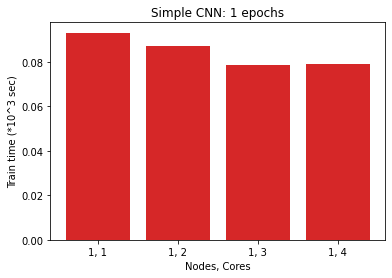

In [ ]:
visualize_grid_search("Simple CNN", epochs, results)

In [ ]:
tabulate_grid_search("Simple CNN", epochs, results)

Simple CNN
| Nodes, Cores   |   fit_time (sec) |
|----------------|------------------|
| 1, 1           |          93.101  |
| 1, 2           |          87.337  |
| 1, 3           |          78.6808 |
| 1, 4           |          78.8286 |


## Training for 2 epochs

In [ ]:
name = "SimpleCNN"

epochs = 2
min_num_nodes = 1
max_num_nodes = 2
min_cores = 1
max_cores = 5

current_training_data = train_data_mnist
current_test_data = test_data_mnist

results2 = grid_search(
    cluster_mode="local",
    min_num_nodes=min_num_nodes,
    max_num_nodes=max_num_nodes,
    min_cores=min_cores,
    max_cores=max_cores,
    epochs=epochs,
    train_data=current_training_data,
    test_data=current_test_data,
    output_model_name="simple"
)


Initializing orca context


/usr/local/lib/python3.7/dist-packages/bigdl/orca/common.py:251: Warning: Use an existing SparkContext, cluster_mode is determined by the existing SparkContext
  "cluster_mode is determined by the existing SparkContext", Warning)


creating: createZooKerasSparseCategoricalCrossEntropy
creating: createLoss
creating: createZooKerasSparseCategoricalAccuracy
creating: createFakeOptimMethod
creating: createTFValidationMethod
creating: createTFValidationMethod
creating: createTFTrainingHelper
creating: createIdentityCriterion
creating: createEstimator
creating: createMaxEpoch
creating: createEveryEpoch
---->>> /tmp/simple2022-09-20_07:01:41.894737.h5, 1 nodes, 1 cores, fitted after 153.67362070083618sec
Saving output to: /tmp/simple2022-09-20_07:01:41.894737.h5
Visualizing from: /tmp/simple2022-09-20_07:01:41.894737.h5
Initializing orca context


/usr/local/lib/python3.7/dist-packages/bigdl/orca/common.py:251: Warning: Use an existing SparkContext, cluster_mode is determined by the existing SparkContext
  "cluster_mode is determined by the existing SparkContext", Warning)


creating: createZooKerasSparseCategoricalCrossEntropy
creating: createLoss
creating: createZooKerasSparseCategoricalAccuracy
creating: createFakeOptimMethod
creating: createTFValidationMethod
creating: createTFValidationMethod
creating: createTFTrainingHelper
creating: createIdentityCriterion
creating: createEstimator
creating: createMaxEpoch
creating: createEveryEpoch
---->>> /tmp/simple2022-09-20_07:04:16.724641.h5, 1 nodes, 2 cores, fitted after 154.6609435081482sec
Saving output to: /tmp/simple2022-09-20_07:04:16.724641.h5
Visualizing from: /tmp/simple2022-09-20_07:04:16.724641.h5
Initializing orca context


/usr/local/lib/python3.7/dist-packages/bigdl/orca/common.py:251: Warning: Use an existing SparkContext, cluster_mode is determined by the existing SparkContext
  "cluster_mode is determined by the existing SparkContext", Warning)


creating: createZooKerasSparseCategoricalCrossEntropy
creating: createLoss
creating: createZooKerasSparseCategoricalAccuracy
creating: createFakeOptimMethod
creating: createTFValidationMethod
creating: createTFValidationMethod
creating: createTFTrainingHelper
creating: createIdentityCriterion
creating: createEstimator
creating: createMaxEpoch
creating: createEveryEpoch
---->>> /tmp/simple2022-09-20_07:06:38.526613.h5, 1 nodes, 3 cores, fitted after 141.61500453948975sec
Saving output to: /tmp/simple2022-09-20_07:06:38.526613.h5
Visualizing from: /tmp/simple2022-09-20_07:06:38.526613.h5
Initializing orca context


/usr/local/lib/python3.7/dist-packages/bigdl/orca/common.py:251: Warning: Use an existing SparkContext, cluster_mode is determined by the existing SparkContext
  "cluster_mode is determined by the existing SparkContext", Warning)


creating: createZooKerasSparseCategoricalCrossEntropy
creating: createLoss
creating: createZooKerasSparseCategoricalAccuracy
creating: createFakeOptimMethod
creating: createTFValidationMethod
creating: createTFValidationMethod
creating: createTFTrainingHelper
creating: createIdentityCriterion
creating: createEstimator
creating: createMaxEpoch
creating: createEveryEpoch
---->>> /tmp/simple2022-09-20_07:09:18.331914.h5, 1 nodes, 4 cores, fitted after 159.5844588279724sec
Saving output to: /tmp/simple2022-09-20_07:09:18.331914.h5
Visualizing from: /tmp/simple2022-09-20_07:09:18.331914.h5


['1, 1', '1, 2', '1, 3', '1, 4'] [0.15367362070083618, 0.15466094350814819, 0.14161500453948975, 0.15958445882797243]
|------|----------|
| 1, 1 | 0.153674 |
| 1, 2 | 0.154661 |
| 1, 3 | 0.141615 |
| 1, 4 | 0.159584 |


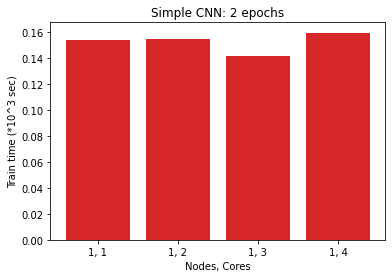

In [ ]:
visualize_grid_search("Simple CNN", epochs, results2)

In [ ]:
tabulate_grid_search("Simple CNN", epochs, results2)

Simple CNN
| Nodes, Cores   |   fit_time (sec) |
|----------------|------------------|
| 1, 1           |          153.674 |
| 1, 2           |          154.661 |
| 1, 3           |          141.615 |
| 1, 4           |          159.584 |


## Training for 5 epochs

In [ ]:
name = "SimpleCNN"

epochs = 5
min_num_nodes = 1
max_num_nodes = 2
min_cores = 1
max_cores = 5

current_training_data = train_data_mnist
current_test_data = test_data_mnist

results5 = grid_search(
    cluster_mode="local",
    min_num_nodes=min_num_nodes,
    max_num_nodes=max_num_nodes,
    min_cores=min_cores,
    max_cores=max_cores,
    epochs=epochs,
    train_data=current_training_data,
    test_data=current_test_data,
    output_model_name="simple"
)


Initializing orca context


/usr/local/lib/python3.7/dist-packages/bigdl/orca/common.py:251: Warning: Use an existing SparkContext, cluster_mode is determined by the existing SparkContext
  "cluster_mode is determined by the existing SparkContext", Warning)


creating: createZooKerasSparseCategoricalCrossEntropy
creating: createLoss
creating: createZooKerasSparseCategoricalAccuracy
creating: createFakeOptimMethod
creating: createTFValidationMethod
creating: createTFValidationMethod
creating: createTFTrainingHelper
creating: createIdentityCriterion
creating: createEstimator
creating: createMaxEpoch
creating: createEveryEpoch
---->>> /tmp/simple2022-09-20_07:14:34.860278.h5, 1 nodes, 1 cores, fitted after 316.113085269928sec
Saving output to: /tmp/simple2022-09-20_07:14:34.860278.h5
Visualizing from: /tmp/simple2022-09-20_07:14:34.860278.h5
Initializing orca context


/usr/local/lib/python3.7/dist-packages/bigdl/orca/common.py:251: Warning: Use an existing SparkContext, cluster_mode is determined by the existing SparkContext
  "cluster_mode is determined by the existing SparkContext", Warning)


creating: createZooKerasSparseCategoricalCrossEntropy
creating: createLoss
creating: createZooKerasSparseCategoricalAccuracy
creating: createFakeOptimMethod
creating: createTFValidationMethod
creating: createTFValidationMethod
creating: createTFTrainingHelper
creating: createIdentityCriterion
creating: createEstimator
creating: createMaxEpoch
creating: createEveryEpoch
---->>> /tmp/simple2022-09-20_07:20:48.234549.h5, 1 nodes, 2 cores, fitted after 373.19031262397766sec
Saving output to: /tmp/simple2022-09-20_07:20:48.234549.h5
Visualizing from: /tmp/simple2022-09-20_07:20:48.234549.h5
Initializing orca context


/usr/local/lib/python3.7/dist-packages/bigdl/orca/common.py:251: Warning: Use an existing SparkContext, cluster_mode is determined by the existing SparkContext
  "cluster_mode is determined by the existing SparkContext", Warning)


creating: createZooKerasSparseCategoricalCrossEntropy
creating: createLoss
creating: createZooKerasSparseCategoricalAccuracy
creating: createFakeOptimMethod
creating: createTFValidationMethod
creating: createTFValidationMethod
creating: createTFTrainingHelper
creating: createIdentityCriterion
creating: createEstimator
creating: createMaxEpoch
creating: createEveryEpoch
---->>> /tmp/simple2022-09-20_07:26:14.354204.h5, 1 nodes, 3 cores, fitted after 325.9302535057068sec
Saving output to: /tmp/simple2022-09-20_07:26:14.354204.h5
Visualizing from: /tmp/simple2022-09-20_07:26:14.354204.h5
Initializing orca context


/usr/local/lib/python3.7/dist-packages/bigdl/orca/common.py:251: Warning: Use an existing SparkContext, cluster_mode is determined by the existing SparkContext
  "cluster_mode is determined by the existing SparkContext", Warning)


creating: createZooKerasSparseCategoricalCrossEntropy
creating: createLoss
creating: createZooKerasSparseCategoricalAccuracy
creating: createFakeOptimMethod
creating: createTFValidationMethod
creating: createTFValidationMethod
creating: createTFTrainingHelper
creating: createIdentityCriterion
creating: createEstimator
creating: createMaxEpoch
creating: createEveryEpoch
---->>> /tmp/simple2022-09-20_07:31:45.464893.h5, 1 nodes, 4 cores, fitted after 330.9294068813324sec
Saving output to: /tmp/simple2022-09-20_07:31:45.464893.h5
Visualizing from: /tmp/simple2022-09-20_07:31:45.464893.h5


['1, 1', '1, 2', '1, 3', '1, 4'] [0.316113085269928, 0.37319031262397767, 0.3259302535057068, 0.3309294068813324]
|------|----------|
| 1, 1 | 0.316113 |
| 1, 2 | 0.37319  |
| 1, 3 | 0.32593  |
| 1, 4 | 0.330929 |


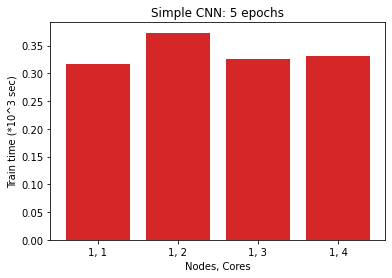

In [ ]:
visualize_grid_search("Simple CNN", epochs, results5)

In [ ]:
tabulate_grid_search("Simple CNN", epochs, results5)

Simple CNN
| Nodes, Cores   |   fit_time (sec) |
|----------------|------------------|
| 1, 1           |          316.113 |
| 1, 2           |          373.19  |
| 1, 3           |          325.93  |
| 1, 4           |          330.929 |
